In [1]:
import neurolab as nl
import matplotlib.pyplot as plt

In [2]:
myinput = [[0,0], [0,1], [1,0], [1,1]]
target = [[0], [0], [0], [1]]

In [5]:
net = nl.net.newp([[0, 1], [0, 1]], 1)

In [6]:
error_progress = net.train(myinput, target, epochs = 100, show = 10, lr = 0.1)

The goal of learning is reached


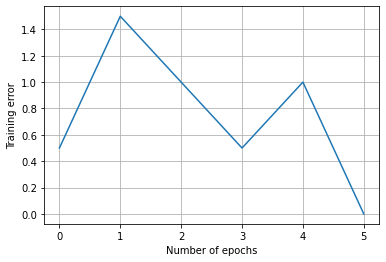

In [7]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.show()

In [8]:
#Örnek-2
import numpy as np

In [9]:
input_data = np.loadtxt('mydata/neural_simple.txt', delimiter = ',')
input_data

array([[2. , 4. , 0. , 0. ],
       [1.5, 3.9, 0. , 0. ],
       [2.2, 4.1, 0. , 0. ],
       [1.9, 4.7, 0. , 0. ],
       [5.4, 2.2, 0. , 1. ],
       [4.3, 7.1, 0. , 1. ],
       [5.8, 4.9, 0. , 1. ],
       [6.5, 3.2, 0. , 1. ],
       [3. , 2. , 1. , 0. ],
       [2.5, 0.5, 1. , 0. ],
       [3.5, 2.1, 1. , 0. ],
       [2.9, 0.3, 1. , 0. ],
       [6.5, 8.3, 1. , 1. ],
       [3.2, 6.2, 1. , 1. ],
       [4.9, 7.8, 1. , 1. ],
       [2.1, 4.8, 1. , 1. ]])

In [10]:
data = input_data[:, 0:2]
labels = input_data[:, 2:]

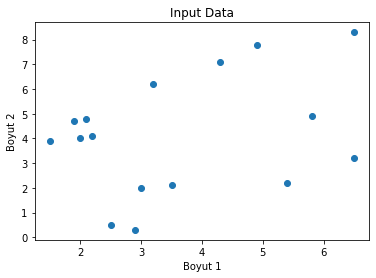

In [12]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Input Data')
plt.show()

In [13]:
dim1_min, dim1_max = data[:, 0].min(), data[:, 1].max()
dim2_min, dim2_max = data[:, 0].min(), data[:, 1].max()

In [14]:
nn_output_layer = labels.shape[1]
print(nn_output_layer)

2


In [15]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
neural_net = nl.net.newp([dim1, dim2], nn_output_layer)

In [16]:
error = neural_net.train(data, labels, epochs = 200, show = 20, lr = 0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
The maximum number of train epochs is reached


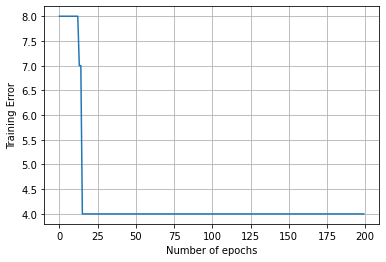

In [17]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training Error')
plt.grid()
plt.show()

In [18]:
print('\n Test sonuçları')
data_test = [[1.5, 3.2], [3.6, 1.7], [3.6, 5.7], [1.6, 3.9]]
for item in data_test:
    print(item, '-->', neural_net.sim([item])[0])


 Test sonuçları
[1.5, 3.2] --> [1. 0.]
[3.6, 1.7] --> [1. 0.]
[3.6, 5.7] --> [1. 1.]
[1.6, 3.9] --> [1. 0.]


In [20]:
#Çok katmanlı sinir ağları
#y = 2x^2 + 8

In [21]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

In [24]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

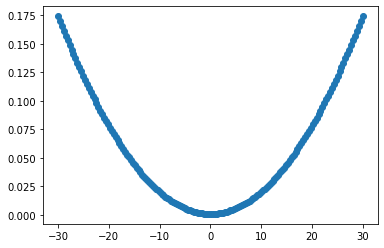

In [25]:
plt.figure()
plt.scatter(data, labels)

In [26]:
neural_net = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [27]:
neural_net.trainf = nl.train.train_gd

In [28]:
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

Epoch: 100; Error: 0.053202446942561335;
Epoch: 200; Error: 0.03604218176969093;
Epoch: 300; Error: 0.024836161946285098;
Epoch: 400; Error: 0.02038418660544167;
Epoch: 500; Error: 0.022532305820203574;
Epoch: 600; Error: 0.0139010752720043;
Epoch: 700; Error: 0.011278521454741019;
Epoch: 800; Error: 0.012343205589714662;
Epoch: 900; Error: 0.012599747708317031;
Epoch: 1000; Error: 0.010341007916582124;
The maximum number of train epochs is reached


In [29]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

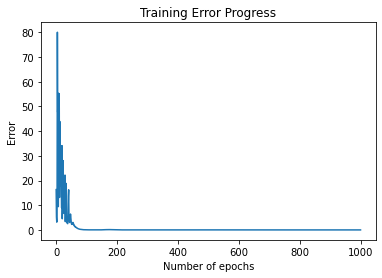

In [30]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training Error Progress')
plt.show()

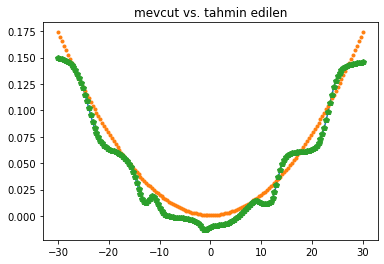

In [33]:
x_dense = np.linspace(min_val, max_val, num_points*2)
y_pred_dense = neural_net.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_pred_dense, '-', x, y, '.', x, y_pred, 'p')
plt.title('mevcut vs. tahmin edilen')
plt.show()